Main Page: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from scipy.stats import norm, skew
import seaborn as sns

In [2]:
%matplotlib inline
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
# pd.set_option('display.expand_frame_repr', False)
sns.set(style="whitegrid", color_codes=True)

In [3]:
train_file_path = '../../data/hp/train.csv'
test_file_path = '../../data/hp/test.csv'

In [4]:
dr = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

### Drop Outlier

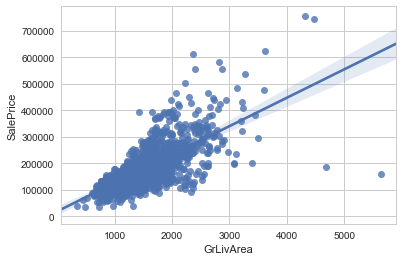

In [5]:
sns.regplot(x="GrLivArea", y="SalePrice", data=dr, color='b')

In [6]:
#Deleting outliers
dr.query('GrLivArea>4000').query('SalePrice<300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [7]:
temp = dr.drop(dr[(dr['GrLivArea']>4000) & (dr['SalePrice']<300000)].index)
temp.to_csv('drop_outlier.train', index=False)
train = pd.read_csv('drop_outlier.train')
print("Train shape %s %s", train.shape)

Train shape %s %s (1458, 81)


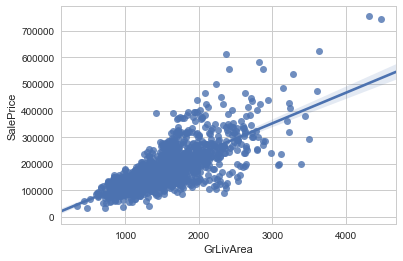

In [8]:
sns.regplot(x="GrLivArea", y="SalePrice", data=train, color='b')

### Feature Analytic

In [9]:
ntrain = 1457
all_data = pd.concat((train, test)).reset_index(drop=True)

### SalePrice 

180932.919067 79467.7889299


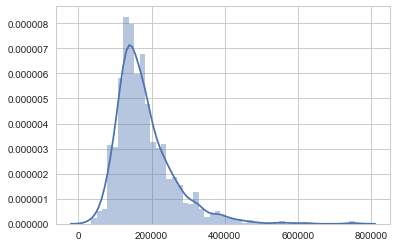

In [46]:
# Sale Price Distribution
(m, sigma) = norm.fit(all_data.loc[:ntrain, ['SalePrice']])
print(m, sigma)
sns.distplot(all_data.loc[:ntrain, ['SalePrice']])

In [10]:
# train data set is [:1457] len is 1458
all_data['SalePrice_log_1p'] = np.log1p(all_data['SalePrice'])

In [44]:
(mu, sigma) = norm.fit(all_data.loc[:ntrain, ['SalePrice_log_1p']])
print(mu, sigma)

12.0240151557 0.399575728365


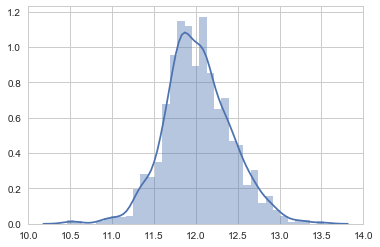

In [45]:
sns.distplot(all_data.loc[:ntrain, ['SalePrice_log_1p']])

In [11]:
c_id = ['Id']
c_cat = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
c_num = ['LotArea', 'BedroomAbvGr', 'PoolArea', 'Fireplaces',
         'YearBuilt', 'TotRmsAbvGrd', 'BsmtFullBath', 'EnclosedPorch', '3SsnPorch',
         'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', 'ScreenPorch',
         '1stFlrSF', '2ndFlrSF', 'BsmtUnfSF', 'YrSold', 'MoSold',
         'KitchenAbvGr', 'GarageCars', 'LotFrontage', 'LowQualFinSF', 'YearRemodAdd',
         'GarageArea', 'BsmtFinSF1', 'GrLivArea', 'BsmtFinSF2', 'WoodDeckSF', 'TotalBsmtSF']

In [377]:
dr.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,enet_result,xgb_result,y_pred
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,730.216049,4.165295,3.028807,70.114883,10505.768861,0.995885,1.945130,2.777092,0.000686,3.023320,...,2.382030,0.290809,6.325103,2007.816872,7.512346,3.772977,180140.566529,180140.566529,180139.890871,180140.566529
std,421.731396,4.164692,0.632450,22.305939,9983.038856,0.064040,1.408283,0.708103,0.026189,1.619885,...,37.509607,1.794275,2.701826,1.328662,1.553060,1.097153,76645.846478,70739.711221,76161.137883,76565.002353
min,1.000000,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000,24286.302401,35545.445312,35207.921948
25%,365.250000,0.000000,3.000000,60.000000,7544.500000,1.000000,0.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129925.000000,128374.032059,130431.003906,130290.561796
50%,730.500000,4.000000,3.000000,70.000000,9475.000000,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000,169522.031074,161599.320312,161336.307530
75%,1094.750000,6.000000,3.000000,80.000000,11600.000000,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,213875.000000,222355.427052,213089.863281,212586.405242
max,1460.000000,14.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,...,738.000000,20.000000,12.000000,2010.000000,8.000000,5.000000,625000.000000,530460.199663,620237.062500,627987.099009


#### Data Correlation

In [ ]:
# heat map

#### Missing Data

In [23]:
def do_fill_na(all_data):
    all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
    all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
    all_data["Alley"] = all_data["Alley"].fillna("None")
    all_data["Fence"] = all_data["Fence"].fillna("None")
    all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
    #Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
    all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
        lambda x: x.fillna(x.median()))
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        all_data[col] = all_data[col].fillna('None')
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        all_data[col] = all_data[col].fillna(0)

    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        all_data[col] = all_data[col].fillna(0)

    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        all_data[col] = all_data[col].fillna('None')

    all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
    all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

    all_data["Functional"] = all_data["Functional"].fillna("Typ")
    
    #'MSZoning missing data '
    all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
    
    #'Electrical'
    all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

    all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

    all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
    all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

    all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

    all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
    
    return all_data

In [24]:
all_data = do_fill_na(all_data)

# all_data = all_data.drop(['Utilities'], axis=1)

null_count = all_data[all_data.columns].isnull().sum()
null_count[null_count > 0].sort_values()
# all_data

SalePrice           1459
SalePrice_log_1p    1459
dtype: int64

#### Feature Convert

In [25]:
from sklearn.preprocessing import LabelEncoder
# process columns, apply LabelEncoder to categorical features
# LabelEncoder: http://sklearn.lzjqsdd.com/modules/preprocessing_targets.html
for c in c_cat:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

#### MSSubClass vs SalePrice

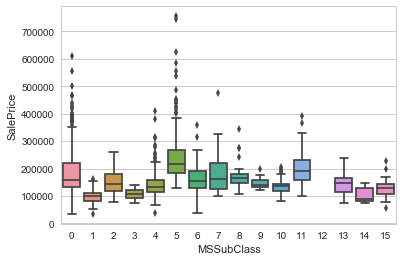

In [47]:
# Display MSSubClass vs SalePrice
sns.boxplot(x="MSSubClass", y="SalePrice", data=all_data)

#### MSZoning vs SalePrice

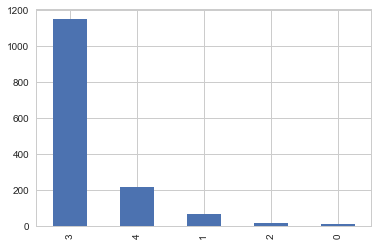

In [20]:
# Show different MSZoning value count
dr['MSZoning'].value_counts().plot(kind='bar')

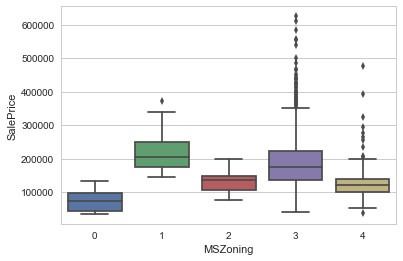

In [372]:
sns.boxplot(x="MSZoning", y="SalePrice", data=dr)

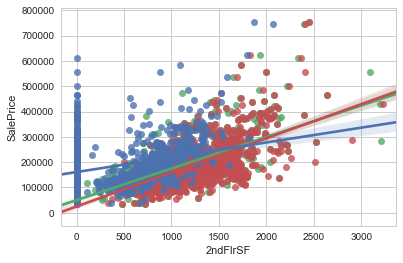

In [48]:
dr = all_data.loc[:ntrain]
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=dr, color="g")
sns.regplot(x="1stFlrSF", y="SalePrice", data=dr, color='r')
sns.regplot(x="2ndFlrSF", y="SalePrice", data=dr, color='b')

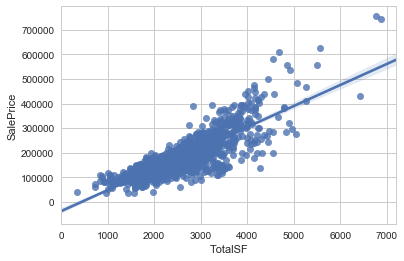

In [26]:
# Adding total sf feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
sns.regplot(x="TotalSF", y="SalePrice", data=all_data)

#### Skew

In [27]:
c_num = set(all_data.columns) - set(['Id','SalePrice', 'SalePrice_log_1p'])

#### Box Cox Transformation of (highly) skewed features

In [28]:
numeric_feats = all_data[list(c_num)].dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])


Skew in numerical features: 

There are 59 skewed numerical features to Box Cox transform


#### Get Dummy

In [29]:
all_data = pd.get_dummies(all_data)

### Error Function

In [342]:
from sklearn.metrics import mean_squared_error
def do_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [39]:
#Validation function
n_folds = 5

def do_rmsle_cv(model, train, y_train):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Base Models Selection

In [370]:
# Model Preparation
n_folds = 5
y_column = ['SalePrice_log']
dr = do_fill_na(dr)
dr = do_cat2num(dr, c_cat)
dr = do_log_y(dr)
dr = do_create_total_sf(dr)
dr = do_un_skewed(dr)

In [30]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

#### Basic Model: Elastic Net

In [320]:
enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
scores = cross_val_score(model_xgb, dr[c_fet], dr[y_column], scoring="neg_mean_squared_error", cv=5)
scores.mean(), scores.std()

(-0.015271942483536324, 0.0026989888346525869)

#### Basic Model: xgb

In [81]:
import xgboost as xgb

In [323]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
scores = cross_val_score(model_xgb, dr[c_fet], dr[y_column], scoring="neg_mean_squared_error", cv=5)
scores.mean(), scores.std()

(-0.015271942483536324, 0.0026989888346525869)

#### Basic Model: Lasso

In [31]:
from sklearn.linear_model import Lasso

In [37]:
c_fet = set(all_data.columns) - set(['Id', 'SalePrice', 'SalePrice_log_1p'])

In [40]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
scores = do_rmsle_cv(lasso, all_data.loc[:1457, list(c_fet)], all_data.loc[:1457, ['SalePrice_log_1p']].values)
scores.mean()

0.11160408131853346

#### Base Model: GradientBoostingRegressor

In [326]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [327]:
gbr_model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
scores = cross_val_score(gbr_model, dr[c_fet], dr[y_column], scoring="neg_mean_squared_error", cv=5)
scores.mean(), scores.std()

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

(-0.015547676366345877, 0.0028969161705933917)

### Stacking Model

In [194]:
from sklearn.linear_model import Lasso

meta_col = ['enet_result', 'xgb_result']

### Trainning Model

In [371]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(dr[c_fet], dr[y_column])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [372]:
lasso = Lasso(alpha =0.0005, random_state=1)
lasso.fit(dr[c_fet], dr[y_column])

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [356]:
def result_from_xgb_lasso(dr):
    y_predict = np.exp((model_xgb.predict(dr[c_fet]) + lasso.predict(dr[c_fet])) / 2)
    return y_predict

In [373]:
dr['y_average_xgb_lasso'] = pd.DataFrame(y_predict)

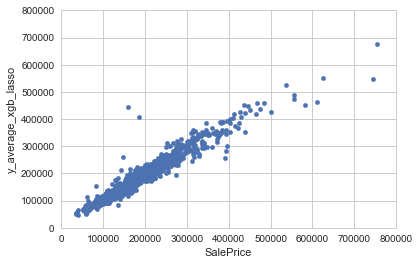

In [374]:
dr.plot.scatter(x='SalePrice', y='y_average_xgb_lasso', ylim=[0, 800000], xlim=[0,800000])

In [94]:
c_fet = set(all_data.columns) - set(['Id','SalePrice', 'SalePrice_log_1p'])
all_data[list(c_fet)]
all_data.loc[:1457, c_fet].shape

(1458, 220)

In [85]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [86]:
r = do_rmsle_cv(lasso, all_data.loc[:1457, c_fet], all_data.loc[:1457, ['SalePrice_log_1p']].values)
r.mean()

0.1119435294023623

In [87]:
lasso.fit(all_data.loc[:1457, c_fet], all_data.loc[:1457, ['SalePrice_log_1p']])

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

### Make Prediction

In [375]:
test = pd.read_csv(test_file_path)
test = do_fill_na(test)
test = do_create_total_sf(test)
test = do_cat2num(test, c_cat)
test = do_un_skewed(test)

In [376]:
# result = sigma * (model_xgb.predict(test[c_fet])) + m
result = result_from_xgb_lasso(test)
result

array([ 117403.87227092,  151058.22472094,  174826.53626587, ...,
        162735.99852648,  117888.63663491,  229947.50279584])

In [95]:
result = np.expm1(lasso.predict(all_data.loc[1458:, c_fet]))
result

array([ 117941.61429022,  154828.38701264,  184391.68051832, ...,
        174377.20996795,  118905.8243289 ,  226734.83292625])

In [104]:
# write file for submission
sub = pd.DataFrame()
sub['Id'] = all_data.loc[ntrain+1:, 'Id']
sub['SalePrice'] = result
sub.to_csv('result.csv',index=False)